In [ ]:
# Name - Nalawade Prafulla Chandrashekhar.
# Class - BE Artificial Intelligence and Data Science.
# Roll No. - 42
# Practical No. 07 - To apply the artificial immune pattern recognition to perform a task of structure damage 
# Classification. 

In [1]:
# Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load and Prepare the Dataset

In [4]:
df = pd.read_csv(r"C:\Users\saira\Downloads\structural_damage_data.csv")

In [5]:
df.head()

,Vibration_Frequency_Hz,Stress_Level_MPa,Crack_Length_mm,Displacement_mm,Temperature_C,Damage_Level
0,43.708611,364.172771,9.256646,5.238910,0.936455,2
1,95.564288,291.243365,27.095047,4.843901,-0.241696,2
2,75.879455,189.287427,43.647292,0.353856,52.500366,1
3,63.879264,416.207759,36.611244,3.478353,-0.036304,3
4,24.041678,358.129028,40.328057,3.863937,1.755978,0


In [6]:
df.tail()

,Vibration_Frequency_Hz,Stress_Level_MPa,Crack_Length_mm,Displacement_mm,Temperature_C,Damage_Level
495,41.801701,91.211933,33.410640,6.603856,19.386038,2
496,62.529050,462.791109,30.974517,9.570485,26.182322,0
497,16.996117,111.568384,23.174702,0.782684,49.246172,0
498,97.695533,477.606809,18.989289,0.664842,58.459147,0
499,98.758967,250.702598,43.166682,2.893652,12.606737,2


In [7]:
df.isnull().sum()

Vibration_Frequency_Hz    0
Stress_Level_MPa          0
Crack_Length_mm           0
Displacement_mm           0
Temperature_C             0
Damage_Level              0
dtype: int64

In [8]:
# Feature Selection and Spiltting data

In [11]:
X = df.drop('Damage_Level', axis=1)  
y = df['Damage_Level']               

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Artificial Immune Pattern Recognition (AIPR) Algorithm

In [16]:
class AIPR:
    def __init__(self, n_clones=20, mutation_rate=0.05, generations=100):
        self.n_clones = n_clones
        self.mutation_rate = mutation_rate
        self.generations = generations

    def fit(self, X, y):
        self.memory_cells = np.random.rand(self.n_clones, X.shape[1])
        self.labels = np.random.choice(np.unique(y), self.n_clones)

        for _ in range(self.generations):
            for i in range(self.n_clones):
                clone = self.memory_cells[i] + self.mutation_rate * np.random.randn(X.shape[1])
                clone_fitness = self._fitness(clone, X, y)

                if clone_fitness > self._fitness(self.memory_cells[i], X, y):
                    self.memory_cells[i] = clone

    def predict(self, X):
        preds = []
        for x in X:
            distances = np.linalg.norm(self.memory_cells - x, axis=1)
            pred = self.labels[np.argmin(distances)]
            preds.append(pred)
        return np.array(preds)

    def _fitness(self, antibody, X, y):
        distances = np.linalg.norm(self.memory_cells - antibody, axis=1)
        closest_label = self.labels[np.argmin(distances)]
        return np.mean(closest_label == y)


In [17]:
# Train and Evaluate the Model

Accuracy: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        41
           1       0.22      0.50      0.31        26
           2       0.22      0.10      0.13        21
           3       0.00      0.00      0.00        12

    accuracy                           0.30       100
   macro avg       0.24      0.24      0.22       100
weighted avg       0.31      0.30      0.28       100



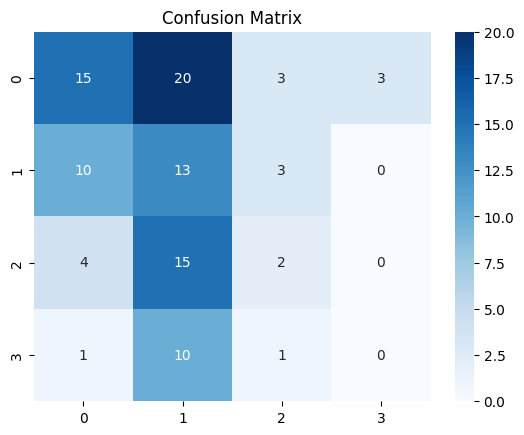

In [18]:
# Initialize and train the AIPR model
model = AIPR(n_clones=20, mutation_rate=0.05, generations=100)
model.fit(X_train.values, y_train.values)

# Make predictions
y_pred = model.predict(X_test.values)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Visualize Result

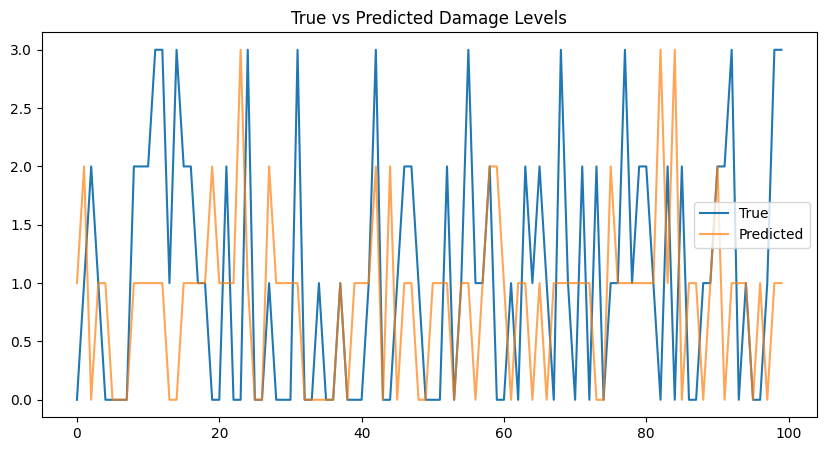

In [20]:
# Compare true vs predicted damage levels
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='True')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('True vs Predicted Damage Levels')
plt.show()
